License: BSD
Author: Sasank Chilamkurthy
https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

In [1]:
import copy
import os
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms

In [14]:
!ls ../..
DATA_DIR = '../../data/hymenoptera_data'
IMG_MEANS = [0.485, 0.456, 0.406]
IMG_SDS = [0.229, 0.224, 0.225]

data      tutorials


In [9]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(IMG_MEANS, IMG_SDS)]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(IMG_MEANS, IMG_SDS)])}

In [10]:
image_datasets = {x: datasets.ImageFolder(os.path.join(DATA_DIR, x), 
                                          data_transforms[x])
                  for x in ['train', 'val']}

In [11]:
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], batch_size=4, shuffle=True, num_workers=4)
    for x in ['train', 'val']}

In [12]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

In [13]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [16]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(IMG_MEANS)
    std = np.array(IMG_SDS)
    inp = std*inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title:
        plt.title(title)
    plt.pause(0.001)

In [17]:
inputs, classes = next(iter(dataloaders['train']))

In [18]:
out = torchvision.utils.make_grid(inputs)

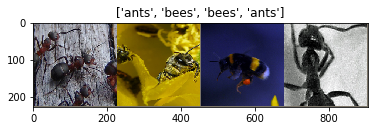

In [19]:
imshow(out, title=[class_names[x] for x in classes])

# Training the Model